In [1]:
import keras
import sklearn
import numpy as np
import pandas as pd


Using TensorFlow backend.
/home/abicharanb/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abicharanb/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abicharanb/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/abicharanb/.local/lib/python3.6/site-packages/t

In [2]:
#reading the necessary files
df_reviewContent = pd.read_csv("~/Documents/P2/TrainModels/data/yelp/review.csv")
df_labelContent = pd.read_csv("~/Documents/P2/TrainModels/data/yelp/label.csv")

In [3]:
df_combined= pd.concat([df_reviewContent, df_labelContent], axis =1, join="inner")
df_trainData = df_combined[["label", "review"]]

df_trainNO = df_trainData.loc[df_trainData['label']== -1][:36000].replace(-1, value=0)
df_trainO = df_trainData.loc[df_trainData['label']== 1][:36000]

df_train = pd.concat([df_trainNO, df_trainO], ignore_index = True)
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [4]:
from keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Dropout, Activation
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



import tensorflow as tf
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [5]:
text = df_train["review"].tolist()
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
data = pad_sequences(sequences, maxlen=500)

In [6]:
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras.constraints import max_norm, unit_norm
from keras.regularizers import l2
model = Sequential()
model.add(Embedding(10000, 128, input_length=500))#20000 300
model.add(Dropout(0.3))

model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, np.array(df_train["label"]), test_size=0.3)

In [8]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
history = model.fit(data, np.array(df_train["label"]), validation_split=0.3, batch_size=200, epochs = 9
, shuffle = True)


Train on 50400 samples, validate on 21600 samples
Epoch 1/9
50400/50400 [==============================] - 25s 496us/step - loss: 0.6377 - accuracy: 0.6138 - val_loss: 0.5745 - val_accuracy: 0.6895
Epoch 2/9
50400/50400 [==============================] - 23s 458us/step - loss: 0.5176 - accuracy: 0.7356 - val_loss: 0.5448 - val_accuracy: 0.7057
Epoch 3/9
50400/50400 [==============================] - 23s 453us/step - loss: 0.4566 - accuracy: 0.7754 - val_loss: 0.5494 - val_accuracy: 0.7105
Epoch 4/9
50400/50400 [==============================] - 23s 453us/step - loss: 0.4068 - accuracy: 0.8070 - val_loss: 0.5840 - val_accuracy: 0.7060
Epoch 5/9
50400/50400 [==============================] - 23s 455us/step - loss: 0.3491 - accuracy: 0.8423 - val_loss: 0.6075 - val_accuracy: 0.6972
Epoch 6/9
50400/50400 [==============================] - 23s 456us/step - loss: 0.2789 - accuracy: 0.8794 - val_loss: 0.7279 - val_accuracy: 0.6941
Epoch 7/9
50400/50400 [==============================] - 23s 

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 64)           41024     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 124, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,387,125
Trainable params: 1,387,125
Non-trainable params: 0
____________________________________________

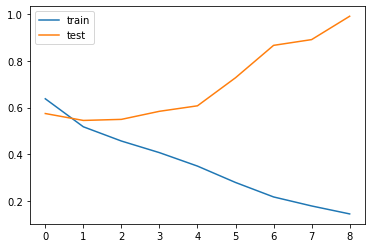

In [12]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7f30cb62aa20>>

In [51]:
text = ["Bookmarked this place so many years ago and is pretty much the only thing I know I wanted to check out in Singapore haha. No long lines, solid chicken and flavorful rice. They may keep my name."]



In [52]:


sequences = tokenizer.texts_to_sequences(text)


data = pad_sequences(sequences, maxlen=500)
result = new_model.predict_proba(np.array(data))

if result[0][0] < 0.5:
    print("Not realistic")
else:
    print("Realistic")

Not realistic


In [49]:
model.save('fakeYelp.h5')


In [50]:
new_model = keras.models.load_model('fakeYelp.h5')


In [56]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)